In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('./online_retail_II_Germany_preprocessed.csv')

In [3]:
df.describe()

,Invoice,Quantity,Price,Customer ID
count,8346.000000,8346.000000,8346.000000,8346.000000
mean,559819.372634,13.523544,2.757295,12647.977235
std,12644.973883,15.686804,3.104513,312.044961
min,536527.000000,1.000000,0.040000,12426.000000
25%,549316.000000,6.000000,1.250000,12480.000000
50%,560728.000000,12.000000,1.650000,12600.000000
75%,570640.000000,12.000000,2.950000,12662.000000
max,581578.000000,198.500000,44.685000,14335.000000


In [4]:
print(df.dtypes)

Invoice          int64
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object


In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
encoder=OrdinalEncoder(dtype='int')
df[['StockCode']]=encoder.fit_transform(df[['StockCode']])

In [7]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536527,905,SET OF 6 T-LIGHTS SANTA,6.0,2010-12-01 13:04:00,2.95,12662.0,Germany
1,536527,1481,ROTATING SILVER ANGELS T-LIGHT HLDR,6.0,2010-12-01 13:04:00,2.55,12662.0,Germany
2,536527,1539,MULTI COLOUR SILVER T-LIGHT HOLDER,12.0,2010-12-01 13:04:00,0.85,12662.0,Germany
3,536527,547,5 HOOK HANGER MAGIC TOADSTOOL,12.0,2010-12-01 13:04:00,1.65,12662.0,Germany
4,536527,549,3 HOOK HANGER MAGIC GARDEN,12.0,2010-12-01 13:04:00,1.95,12662.0,Germany
...,...,...,...,...,...,...,...,...
8341,581578,1022,SET OF 4 PANTRY JELLY MOULDS,12.0,2011-12-09 12:16:00,1.25,12713.0,Germany
8342,581578,960,PACK OF 20 NAPKINS PANTRY DESIGN,12.0,2011-12-09 12:16:00,0.85,12713.0,Germany
8343,581578,961,PACK OF 20 NAPKINS RED APPLES,12.0,2011-12-09 12:16:00,0.85,12713.0,Germany
8344,581578,1153,JINGLE BELL HEART ANTIQUE SILVER,12.0,2011-12-09 12:16:00,2.08,12713.0,Germany


In [8]:
# determine the last purchase date (recency)
recency=df.groupby(by='Customer ID',as_index=False)['InvoiceDate'].max()
recency.columns=['Customer ID','Buy Date']
recency.head()

,Customer ID,Buy Date
0,12426.0,2011-05-29 12:26:00
1,12427.0,2011-11-18 08:56:00
2,12468.0,2011-06-05 11:36:00
3,12471.0,2011-12-07 15:43:00
4,12472.0,2011-11-07 14:01:00


In [9]:
# convert Buy Date from string to datetime
recency['Buy Date']=pd.to_datetime(recency['Buy Date'])

In [10]:
latest=pd.to_datetime(recency['Buy Date'].max())

In [11]:
# number of days since the last purchase (most recent date in the entire dataset) for each customer.
recency['Recency']=recency['Buy Date'].apply(lambda x: (latest-x).days)

In [12]:
recency

,Customer ID,Buy Date,Recency
0,12426.0,2011-05-29 12:26:00,193
1,12427.0,2011-11-18 08:56:00,21
2,12468.0,2011-06-05 11:36:00,187
3,12471.0,2011-12-07 15:43:00,1
4,12472.0,2011-11-07 14:01:00,31
...,...,...,...
89,13814.0,2011-09-08 13:48:00,91
90,13815.0,2011-11-17 14:19:00,21
91,13816.0,2011-11-16 08:38:00,23
92,13817.0,2011-11-10 17:49:00,28


In [13]:
# number of times the customer purchased products in the data.

frequency=df.groupby(by=['Customer ID'],as_index=False)['StockCode'].count()
frequency.columns=['Customer ID 3','Frequency']
frequency

,Customer ID 3,Frequency
0,12426.0,29
1,12427.0,27
2,12468.0,35
3,12471.0,424
4,12472.0,317
...,...,...
89,13814.0,52
90,13815.0,159
91,13816.0,24
92,13817.0,22


In [14]:
# monetary is a DataFrame containing information about the total spending of each customer.
df['TotalValue']=df['Quantity']*df['Price']
monetary=df.groupby(by=['Customer ID'],as_index=False).agg({'TotalValue': 'sum'})
monetary.columns=['Customer ID 2','Monetary']
monetary

,Customer ID 2,Monetary
0,12426.0,510.730
1,12427.0,656.105
2,12468.0,644.040
3,12471.0,16982.030
4,12472.0,5809.630
...,...,...
89,13814.0,1477.300
90,13815.0,3331.925
91,13816.0,457.430
92,13817.0,328.980


In [15]:
# Combine the three DataFrames into one DataFrame called RFM.
RFM=pd.concat([recency,frequency,monetary],axis=1)
RFM=RFM.drop(columns=['Customer ID 2','Customer ID 3','Buy Date'])
RFM

,Customer ID,Recency,Frequency,Monetary
0,12426.0,193,29,510.730
1,12427.0,21,27,656.105
2,12468.0,187,35,644.040
3,12471.0,1,424,16982.030
4,12472.0,31,317,5809.630
...,...,...,...,...
89,13814.0,91,52,1477.300
90,13815.0,21,159,3331.925
91,13816.0,23,24,457.430
92,13817.0,28,22,328.980


### Building RFM Segments

In [16]:
# classify customers into score groups based on three factors in RFM analysis
RFM['R']=pd.qcut(RFM['Recency'].rank(method='first'),5,labels=[5,4,3,2,1])
RFM['F']=pd.qcut(RFM['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
RFM['M']=pd.qcut(RFM['Monetary'].rank(method='first'),5,labels=[1,2,3,4,5])

explaining how qcut() work?

In [17]:
RFM

,Customer ID,Recency,Frequency,Monetary,R,F,M
0,12426.0,193,29,510.730,1,2,2
1,12427.0,21,27,656.105,4,2,3
2,12468.0,187,35,644.040,1,3,2
3,12471.0,1,424,16982.030,5,5,5
4,12472.0,31,317,5809.630,3,5,5
...,...,...,...,...,...,...,...
89,13814.0,91,52,1477.300,2,3,4
90,13815.0,21,159,3331.925,4,5,5
91,13816.0,23,24,457.430,4,2,2
92,13817.0,28,22,328.980,3,2,1


In [18]:
# Build RFM Segment and RFM Score
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])

RFM['RFM_Segment'] = RFM.apply(add_rfm, axis=1)

RFM['RFM_Score'] = RFM[['R', 'F', 'M']].sum(axis=1)

RFM.head()

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
0,12426.0,193,29,510.730,1,2,2,1.02.02.0,5
1,12427.0,21,27,656.105,4,2,3,4.02.03.0,9
2,12468.0,187,35,644.040,1,3,2,1.03.02.0,6
3,12471.0,1,424,16982.030,5,5,5,5.05.05.0,15
4,12472.0,31,317,5809.630,3,5,5,3.05.05.0,13


- A higher total RFM score indicates a customer who is highly engaged: they bought recently, 
buy frequently, and spend a lot.
- A lower total RFM score indicates a customer who is less engaged: they haven't bought recently, 
buy infrequently, and spend less.

## Analyzing RFM Segments

In [19]:
RFM_Segment = RFM.groupby(['RFM_Segment']).size().sort_values(ascending=False)[:5]

print(RFM_Segment)

RFM_Segment
4.05.05.0    7
5.05.05.0    6
1.01.01.0    5
1.02.02.0    4
2.01.01.0    4
dtype: int64


Tại sao không phân khúc dựa trên RFM_Score?

- RFM_Score : 
    + chỉ đơn giản là cộng các điểm R, F, và M lại với nha
    + Không phản ánh đủ sự khác biệt giữa các khách hàng trong từng yếu tố riêng biệt (R, F, M).

- RFM_Segment: 
    + kết hợp ba giá trị R, F, và M thành một phân khúc duy nhất, ví dụ, '455' cho một khách hàng có R = 4, F = 5, M = 5.
    + giúp bạn hiểu rõ hơn về hành vi của khách hàng trong từng yếu tố riêng biệt.
    + Sử dụng RFM_Segment có thể tạo ra nhiều phân nhóm hơn. Mặc dù vậy, đây cũng là một cách để phân nhóm một cách chi tiết và rõ ràng.

- Sử dụng RFM_Segment: Thích hợp hơn khi bạn muốn phân nhóm khách hàng theo hành vi mua sắm cụ thể dựa trên từng yếu tố R, F, và M. Phương pháp này giúp bạn hiểu rõ hơn về hành vi của khách hàng trong các nhóm khác nhau.

## Summary metrics per RFM Score

In [20]:
RFM.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean',

'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3           300.6      10.2    156.5     5
4           129.3      16.7    322.8     7
5           147.0      19.2    361.1     8
6            79.5      21.6    475.6    10
7            69.2      28.7    711.0     6
8            50.0      38.8    662.8     5
9            96.2      64.3   1211.4    13
10           55.4      66.3   2379.9     7
11           19.8      88.8   1653.9     5
12           25.1     128.1   2818.0     7
13           12.8     142.8   2798.9     5
14           15.1     226.2   5824.2    10
15            4.7     304.2   7801.1     6

### Use RFM score to group customers into gold, silver and bronze segments

count    94.000000
mean      9.000000
std       3.648538
min       3.000000
25%       6.000000
50%       9.000000
75%      12.000000
max      15.000000
Name: RFM_Score, dtype: float64


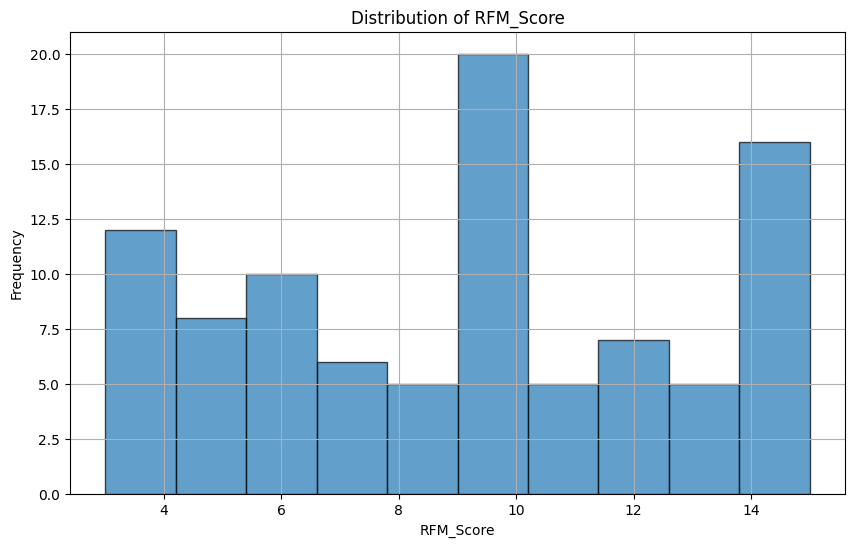

In [21]:
import matplotlib.pyplot as plt

# In mô tả phân phối của RFM_Score
print(RFM['RFM_Score'].describe())

# Vẽ histogram để trực quan hóa phân phối của RFM_Score
plt.figure(figsize=(10,6))
plt.hist(RFM['RFM_Score'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of RFM_Score')
plt.xlabel('RFM_Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [22]:
def segments(df):
  if df['RFM_Score'] > 12 :
    return 'Gold'
  elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 12 ):
    return 'Silver'
  else:
    return 'Bronze'

RFM['General_Segment'] = RFM.apply(segments,axis=1)
RFM.groupby('General_Segment').agg({'Recency':'mean','Frequency':'mean',
'Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
                   mean      mean     mean count
General_Segment                                 
Bronze            179.2      16.1    296.5    20
Gold               11.6     228.6   5668.7    21
Silver             63.6      60.8   1372.4    53

Merged rfm and main dataframe

In [23]:
mdf=pd.merge(df,RFM,on='Customer ID')

mdf

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalValue,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,General_Segment
0,536527,905,SET OF 6 T-LIGHTS SANTA,6.0,2010-12-01 13:04:00,2.95,12662.0,Germany,17.70,0,212,3413.88,5,5,5,5.05.05.0,15,Gold
1,536527,1481,ROTATING SILVER ANGELS T-LIGHT HLDR,6.0,2010-12-01 13:04:00,2.55,12662.0,Germany,15.30,0,212,3413.88,5,5,5,5.05.05.0,15,Gold
2,536527,1539,MULTI COLOUR SILVER T-LIGHT HOLDER,12.0,2010-12-01 13:04:00,0.85,12662.0,Germany,10.20,0,212,3413.88,5,5,5,5.05.05.0,15,Gold
3,536527,547,5 HOOK HANGER MAGIC TOADSTOOL,12.0,2010-12-01 13:04:00,1.65,12662.0,Germany,19.80,0,212,3413.88,5,5,5,5.05.05.0,15,Gold
4,536527,549,3 HOOK HANGER MAGIC GARDEN,12.0,2010-12-01 13:04:00,1.95,12662.0,Germany,23.40,0,212,3413.88,5,5,5,5.05.05.0,15,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8341,581578,1022,SET OF 4 PANTRY JELLY MOULDS,12.0,2011-12-09 12:16:00,1.25,12713.0,Germany,15.00,0,33,689.91,5,2,3,5.02.03.0,10,Silver
8342,581578,960,PACK OF 20 NAPKINS PANTRY DESIGN,12.0,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20,0,33,689.91,5,2,3,5.02.03.0,10,Silver
8343,581578,961,PACK OF 20 NAPKINS RED APPLES,12.0,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20,0,33,689.91,5,2,3,5.02.03.0,10,Silver
8344,581578,1153,JINGLE BELL HEART ANTIQUE SILVER,12.0,2011-12-09 12:16:00,2.08,12713.0,Germany,24.96,0,33,689.91,5,2,3,5.02.03.0,10,Silver


Created 3 data frames based on RFM segments to perform MBA.

In [24]:
Bronze_seg = mdf[mdf.General_Segment == 'Bronze']
Silver_seg = mdf[mdf.General_Segment == 'Silver']
Gold_seg = mdf[mdf.General_Segment == 'Gold']

In [25]:
print(Bronze_seg.describe())

             Invoice    StockCode    Quantity       Price   Customer ID  \
count     322.000000   322.000000  322.000000  322.000000    322.000000   
mean   555235.655280   676.254658   10.919255    3.008339  12616.394410   
std     11133.794106   461.982654    8.809139    4.101328    236.319065   
min    536840.000000     1.000000    1.000000    0.040000  12426.000000   
25%    545718.000000   224.000000    6.000000    0.850000  12527.000000   
50%    554435.000000   652.000000   10.000000    1.650000  12580.000000   
75%    566739.000000   996.000000   12.000000    2.950000  12622.000000   
max    573629.000000  1630.000000  100.000000   44.685000  13811.000000   

       TotalValue     Recency   Frequency    Monetary   RFM_Score  
count  322.000000  322.000000  322.000000  322.000000  322.000000  
mean    18.418711  172.419255   18.291925  331.515854    4.319876  
std     12.069675   96.728744    5.069781  123.657699    0.732113  
min      2.500000   38.000000    1.000000   15.00000

# Data Pre-Processing for K-means Clustering

Khi bạn thực hiện K-means, mô hình sẽ giả định rằng các biến đầu vào có cùng quy mô, tức là có trung bình và phương sai tương đương nhau, để đảm bảo rằng các biến sẽ đóng góp tương đương vào việc tính toán khoảng cách giữa các điểm dữ liệu. Nếu các biến có phương sai rất khác nhau, các biến có phương sai lớn sẽ có ảnh hưởng mạnh hơn trong việc phân cụm, điều này có thể làm giảm độ chính xác của mô hình.

In [26]:
rfm_rfm = RFM[['Recency','Frequency','Monetary']]
print(rfm_rfm.describe())

          Recency   Frequency      Monetary
count   94.000000   94.000000     94.000000
mean    76.595745   88.787234   2103.329309
std     91.419077   99.695760   2889.287373
min      0.000000    1.000000     15.000000
25%     15.250000   21.250000    461.372500
50%     30.000000   49.000000    913.430000
75%     91.000000  128.250000   2712.547500
max    371.000000  430.000000  16982.030000


In [27]:
from sklearn.preprocessing import StandardScaler

rfm_features = RFM[['Recency', 'Frequency', 'Monetary']]

# Standardize the features
scaler = StandardScaler() 
rfm_scaled = scaler.fit_transform(rfm_features)
rfm_rfm = pd.DataFrame(rfm_scaled, index=RFM.index, columns=rfm_features.columns)
rfm_rfm


,Recency,Frequency,Monetary
0,1.280131,-0.602912,-0.554164
1,-0.611402,-0.623081,-0.503579
2,1.214147,-0.542407,-0.507777
3,-0.831348,3.380386,5.177221
4,-0.501430,2.301366,1.289651
...,...,...,...
89,0.158408,-0.370974,-0.217834
90,-0.611402,0.708047,0.427505
91,-0.589408,-0.653334,-0.572710
92,-0.534421,-0.673503,-0.617406


# Plot the distribution of RFM values

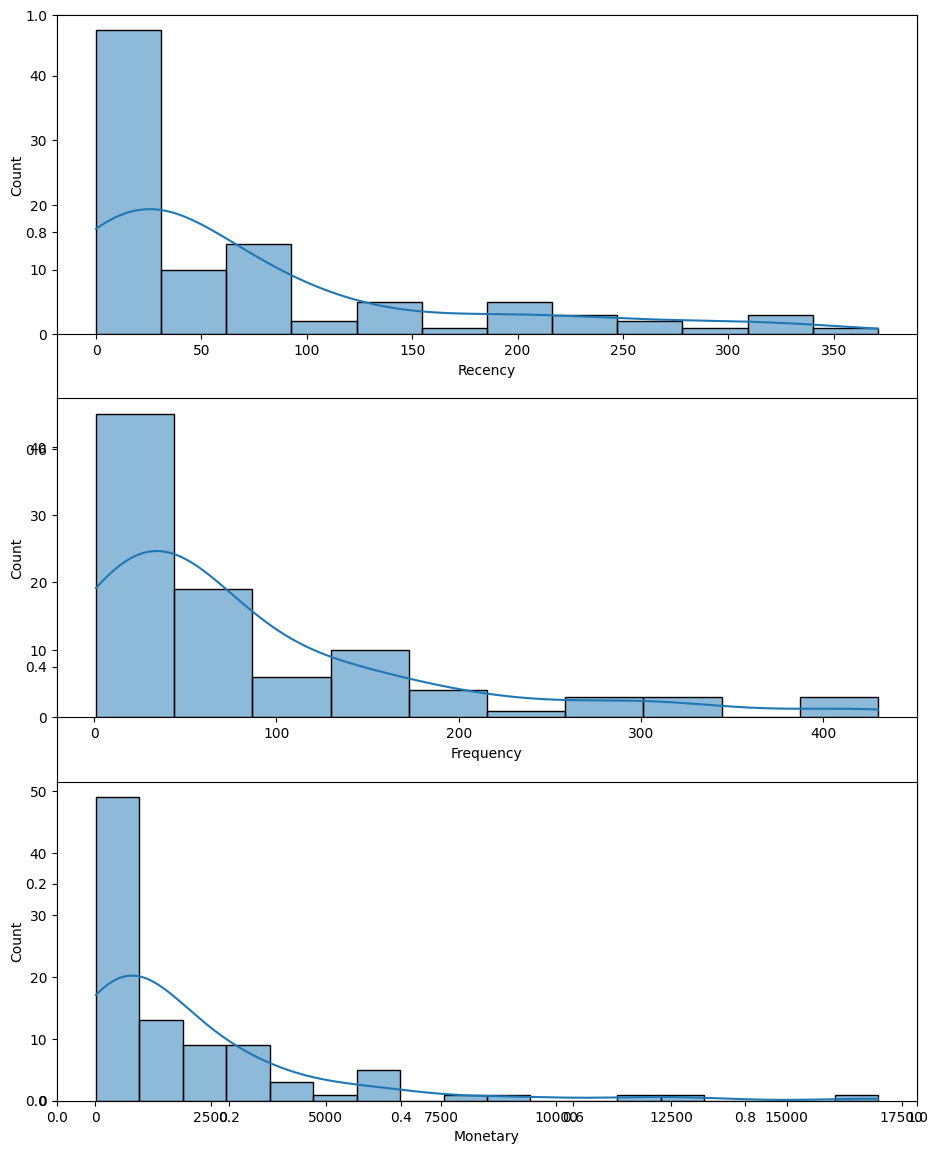

In [28]:
import seaborn as sns

f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.histplot(RFM.Recency, kde=True, label='Recency')
plt.subplot(3, 1, 2); sns.histplot(RFM.Frequency, kde=True, label='Frequency')
plt.subplot(3, 1, 3); sns.histplot(RFM.Monetary, kde=True, label='Monetary')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

- Nếu hầu hết dữ liệu nằm ở bên trái của biểu đồ nhưng một số giá trị lớn hơn nằm ở bên phải thì dữ liệu được cho là bị lệch sang bên phải.

- Xử lí : 
We use these Sequence of structuring pre-processing steps:

1. Unskew the data – log transformation

2. Standardize to the same average values

3. Scale to the same standard deviation

4. Store as a separate array to be used for clustering

Why the Sequence Matters?

  + Log transformation only works with positive data
  + Normalization forces data to have negative values and log will not work


### Unskew the data with log transformation

Các giá trị lớn sẽ bị giảm bớt, giúp phân phối của dữ liệu trở nên gần chuẩn hơn (normal distribution).

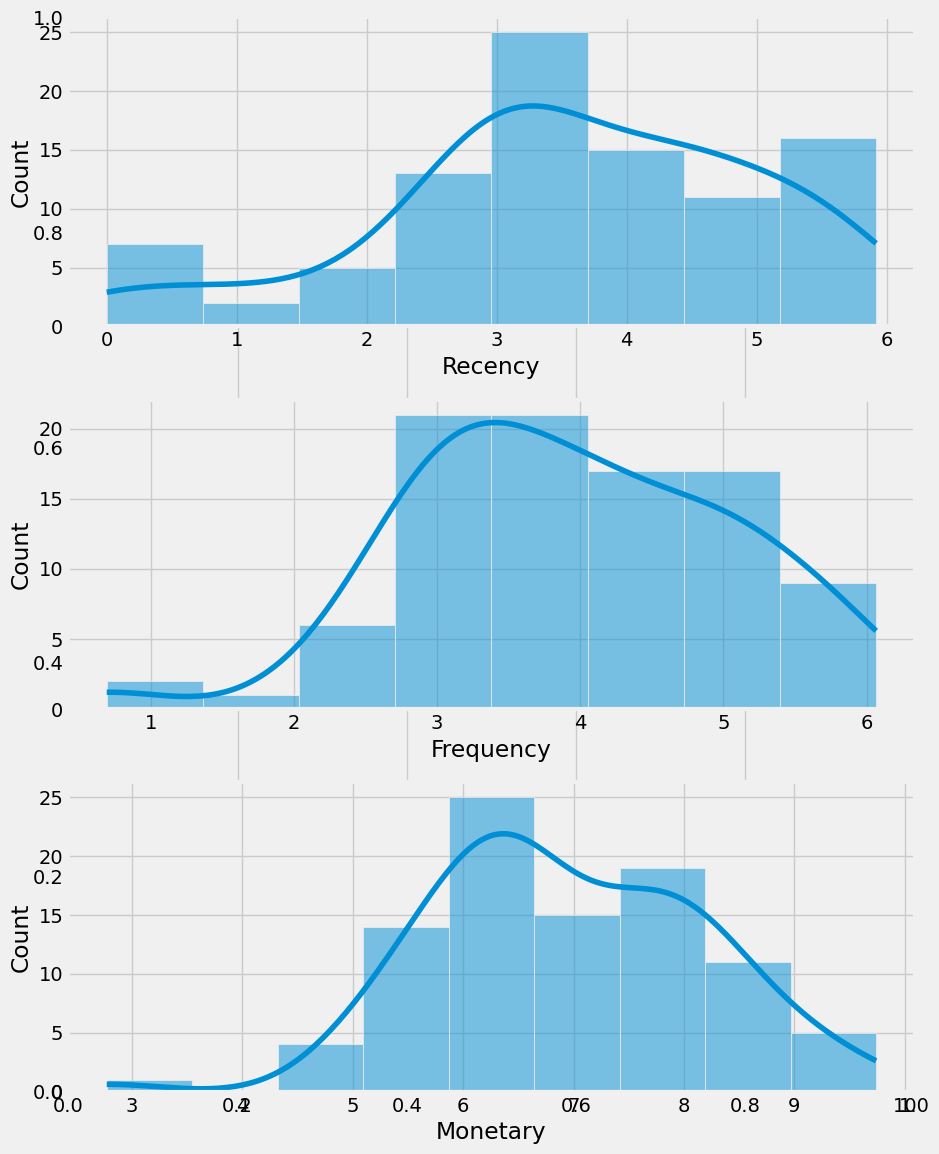

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Add a small constant to avoid log(0)
rfm_log = RFM[['Recency', 'Frequency', 'Monetary']].apply(lambda x: np.log1p(x), axis=1).round(3)

# plot the distribution of RFM values
f, ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.histplot(rfm_log.Recency, kde=True, label='Recency')
plt.subplot(3, 1, 2); sns.histplot(rfm_log.Frequency, kde=True, label='Frequency')
plt.subplot(3, 1, 3); sns.histplot(rfm_log.Monetary, kde=True, label='Monetary')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

Dữ liệu sau khi log transformation sẽ được chuẩn hóa với StandardScaler để đảm bảo rằng các đặc trưng (Recency, Frequency, Monetary) có cùng độ lệch chuẩn và giá trị trung bình 0. Điều này quan trọng đối với thuật toán K-means, vì K-means sử dụng khoảng cách Euclidean để tính toán các cluster, và nếu các đặc trưng có đơn vị khác nhau hoặc có độ lệch chuẩn khác nhau, điều đó sẽ ảnh hưởng đến kết quả phân cụm.

In [30]:
#Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)

#Store it separately for clustering
rfm_normalized= scaler.transform(rfm_log)

### Choosing no of Clusters

- Tìm số lượng cluster tối ưu (K): Phần này dùng phương pháp "Elbow" để tìm số lượng cluster tối ưu. Phương pháp này dựa trên việc tính toán inertia (độ phân tán bên trong mỗi cluster). Inertia càng thấp thì các điểm trong cluster càng gần với centroid, nhưng nếu chọn số lượng cluster quá nhiều thì inertia sẽ nhỏ hơn rất nhiều, mặc dù đó có thể là quá nhiều cluster không thực sự cần thiết.

- Vẽ biểu đồ Elbow: Biểu đồ này sẽ giúp bạn nhận biết điểm uốn (elbow) trong đường cong, tức là số lượng cluster tại đó inertia bắt đầu giảm chậm lại. Điểm này thường là lựa chọn tối ưu cho số lượng cluster.


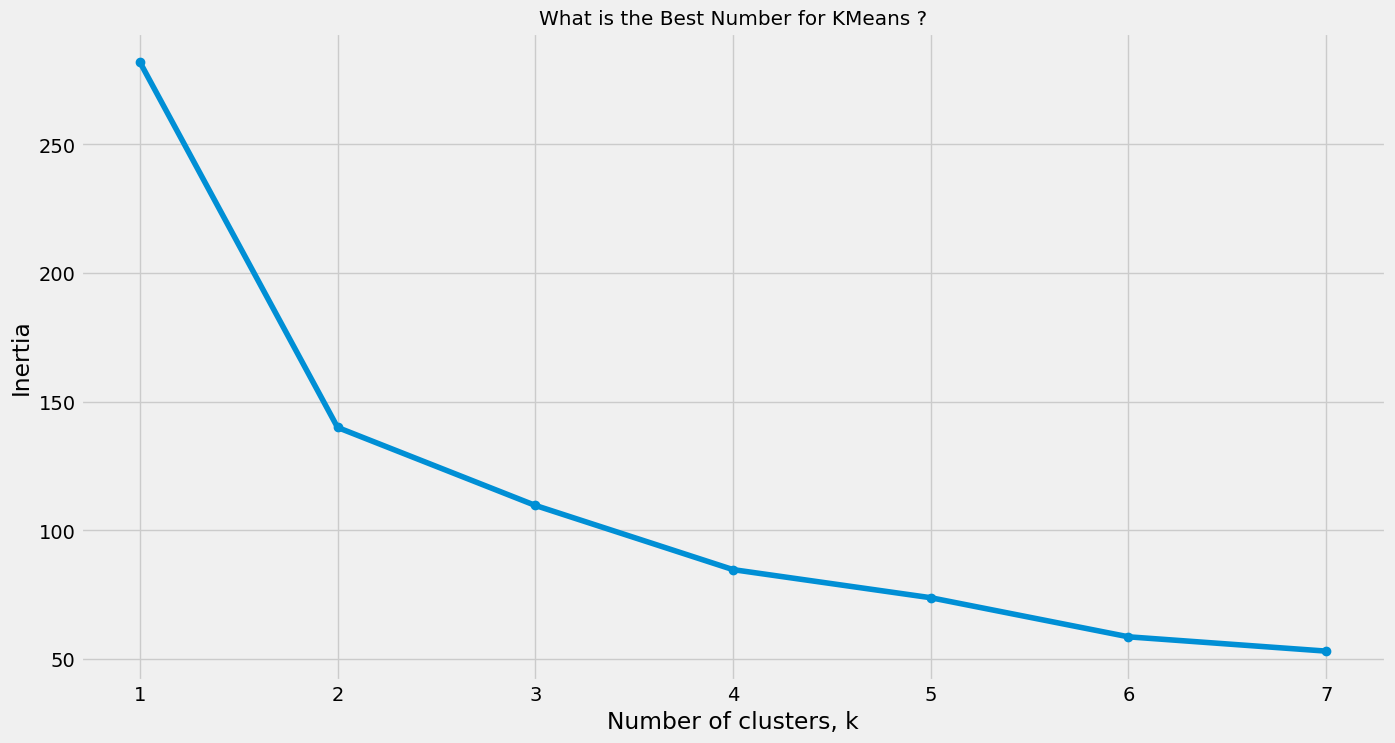

In [31]:
from sklearn.cluster import KMeans
#First : Get the Best KMeans 
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

    
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()


# Clustering

In [32]:
kc = KMeans(n_clusters= 2, random_state=1)
kc.fit(rfm_normalized)

#Create a cluster label column in the original DataFrame
cluster_labels = kc.labels_

# Cột mới có tên là K_Cluster và chứa nhãn phân cụm từ cluster_labels. 
# Mỗi khách hàng sẽ có một giá trị trong cột này, xác định nhóm phân cụm mà khách hàng đó thuộc về.
rfm_rfm_k3 = rfm_rfm.assign(K_Cluster = cluster_labels)

#Calculate average RFM values and sizes for each cluster:
rfm_rfm_k3.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean',
                                        'Monetary': ['mean', 'count'],}).round(0)

Recency Frequency Monetary      
             mean      mean     mean count
K_Cluster                                 
0             0.0      -1.0     -1.0    55
1            -1.0       1.0      1.0    39

Giải thích tại sao ?

### Snake Plots to Understand and Compare Segments

In [33]:
rfm_normalized = pd.DataFrame(rfm_normalized, index=rfm_rfm.index, columns=rfm_rfm.columns)

rfm_normalized['Customer ID'] = RFM['Customer ID']
rfm_normalized['K_Cluster'] = kc.labels_
rfm_normalized['General_Segment'] = RFM['General_Segment']

rfm_normalized.reset_index(drop=True, inplace=True)

# Melt the data into a long format so RFM values and metric names are stored in 1 column each
rfm_melt = pd.melt(rfm_normalized, id_vars=['Customer ID', 'General_Segment', 'K_Cluster'],
                  value_vars=['Recency', 'Frequency', 'Monetary'],
                  var_name='Metric', value_name='Value')

rfm_melt[rfm_melt['Customer ID'] == 12426.0]

,Customer ID,General_Segment,K_Cluster,Metric,Value
0,12426.0,Bronze,0,Recency,1.180857
94,12426.0,Bronze,0,Frequency,-0.470765
188,12426.0,Bronze,0,Monetary,-0.573170


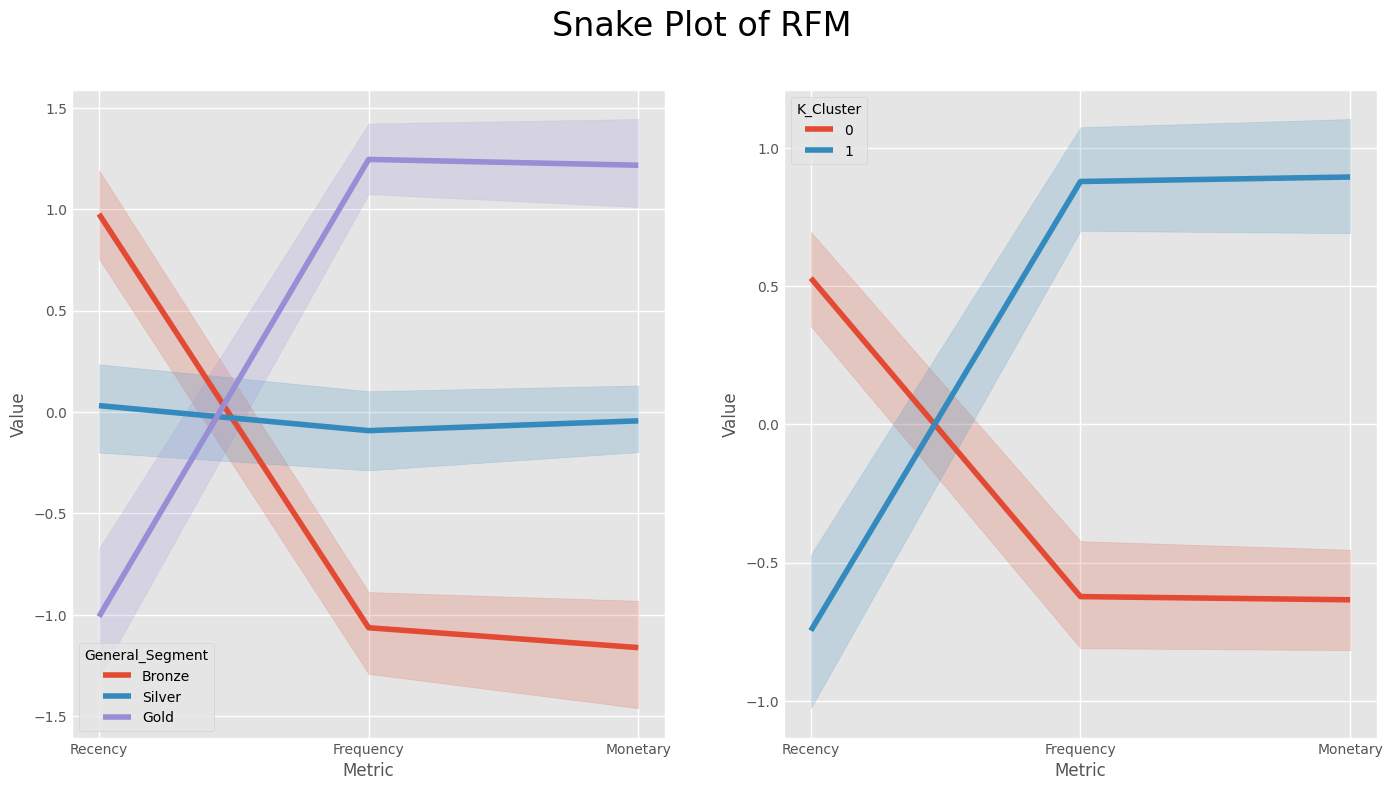

In [34]:
# Snake plot with customer segments
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 8))
sns.lineplot(x = 'Metric', y = 'Value', hue = 'General_Segment', data = rfm_melt,ax=ax1)

# a snake plot with K-Means
sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Cluster', data = rfm_melt,ax=ax2)
plt.suptitle("Snake Plot of RFM",fontsize=24) #make title fontsize subtitle 

plt.show()

## NHẬN XÉT BIỂU ĐỒ 1

1. Recency (Sự gần đây của giao dịch):

  + Gold: Giá trị Recency = -1. Điều này cho thấy khách hàng trong nhóm Gold đã mua hàng gần đây hơn so với phần còn lại. Vì giá trị chuẩn hóa âm có nghĩa là các khách hàng trong nhóm này có hành vi mua sắm gần đây hơn so với trung bình của tất cả khách hàng. (vì mua hàng gần đây, giá trị recency nhỏ, nên mang giá trị âm)

  + Silver: Giá trị Recency = 0 cho thấy khách hàng trong nhóm Silver mua hàng cách đây một thời gian tương đối, gần bằng trung bình của tất cả khách hàng.

  + Bronze: Giá trị Recency = 1 cho thấy khách hàng trong nhóm Bronze có hành vi mua sắm lâu hơn, tức là họ ít mua sắm gần đây. Giá trị chuẩn hóa dương có nghĩa là họ mua hàng ít gần đây hơn so với trung bình.

2. Frequency (Tần suất mua hàng):

  + Gold: Giá trị Frequency = 1.2. Khách hàng trong nhóm Gold có tần suất mua sắm cao hơn trung bình. Đây là nhóm khách hàng trung thành và thường xuyên quay lại mua hàng.

  + Silver: Giá trị Frequency = -0.2. Khách hàng trong nhóm Silver có tần suất mua sắm thấp hơn một chút so với trung bình. Họ có thể mua hàng ít thường xuyên hơn so với nhóm Gold nhưng vẫn cao hơn nhóm Bronze.

  + Bronze: Giá trị Frequency = -1.1 cho thấy khách hàng trong nhóm Bronze mua sắm ít thường xuyên, gần như ít hơn so với phần lớn khách hàng. Đây là nhóm khách hàng ít tham gia vào các giao dịch mua hàng.

3. Monetary (Giá trị chi tiêu):

  + Gold: Giá trị Monetary = 1.2 cho thấy khách hàng trong nhóm Gold chi tiêu rất nhiều, cao hơn trung bình. Họ là những khách hàng có giá trị cao và đóng góp nhiều vào doanh thu.

  + Silver: Giá trị Monetary = -0.2 cho thấy khách hàng trong nhóm Silver chi tiêu ít hơn nhóm Gold nhưng vẫn ở mức chấp nhận được.

  + Bronze: Giá trị Monetary = -1.1 cho thấy khách hàng trong nhóm Bronze có mức chi tiêu thấp nhất. Họ chi tiêu ít hơn so với phần lớn khách hàng khác và có thể là những khách hàng ít mang lại doanh thu.

--------------------
* Ứng dụng thực tế:
  - Bạn có thể tập trung vào nhóm Gold với các chiến lược chăm sóc khách hàng tốt nhất, chương trình khách hàng thân thiết, hoặc các ưu đãi đặc biệt để duy trì họ.
  - Với nhóm Silver, bạn có thể thử các chiến lược tái kích hoạt (ví dụ: gửi email hoặc khuyến mãi đặc biệt để kích thích mua sắm lại).
  - Nhóm Bronze cần các chiến lược chuyển đổi hoặc tái kích hoạt như khuyến mãi, quảng cáo, hoặc khảo sát để hiểu lý do vì sao họ ít mua sắm và tìm cách thay đổi hành vi của họ.

## NHẬN XÉT BIỂU ĐỒ 2

1. Cluster 0:
+ Recency = 0.5: Mua gần đây nhưng tần suất và chi tiêu thấp.
+ Frequency = -0.75: Mua sắm không thường xuyên.
+ Monetary = -0.75: Chi tiêu thấp.

Tóm tắt: Đây là nhóm khách hàng ít mua sắm, chi tiêu ít và không thường xuyên giao dịch. Nhóm này có thể là những khách hàng cũ hoặc không quá quan tâm đến sản phẩm/dịch vụ của bạn.

2. Cluster 1:
+ Recency = -0.75: Không mua gần đây.
+ Frequency = 0.75: Tần suất mua sắm cao, họ là khách hàng trung thành.
+ Monetary = 0.75: Chi tiêu cao, nhóm này đóng góp lớn vào doanh thu.

Tóm tắt: Đây là nhóm khách hàng rất trung thành và có chi tiêu cao, mặc dù họ không mua hàng gần đây. Cần áp dụng các chiến lược để tái kích hoạt họ nếu họ đã ngừng mua sắm.

-------------

- Cluster 0 có thể được nhắm đến trong các chiến dịch tái kích hoạt hoặc tăng sự tham gia bằng cách cung cấp các ưu đãi đặc biệt, gửi email thông báo về các sản phẩm mới hoặc giảm giá.

- Cluster 1 có thể được chăm sóc bằng các chiến lược khách hàng trung thành, như các chương trình ưu đãi dành riêng cho khách hàng thân thiết, hoặc gửi quà tặng hoặc giảm giá cho các lần mua sắm tiếp theo để giữ họ quay lại.

# Market Basket Analysis

In [35]:
basket_bronze = (Bronze_seg.groupby(['Invoice', 'StockCode'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))

basket_bronze.copy = basket_bronze 
basket_bronze.copy.head() 

StockCode,1,20,21,24,25,28,29,41,43,44,...,1539,1554,1573,1575,1577,1582,1595,1596,1606,1630
Invoice,,,,,,,,,,,,,,,,,,,,,
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0
541480,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
basket_bronze.copy = basket_bronze.copy.astype(int)
basket_bronze.copy.shape

(32, 237)

In [37]:
# Xác định một cách đơn giản liệu sản phẩm đã được mua hay chưa.

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_bronze_sets = basket_bronze.copy.applymap(encode_units)

basket_bronze_sets.head()

/var/folders/pm/vdvchn5d3psc1n3ny2r3hpwr0000gn/T/ipykernel_73469/278805558.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_bronze_sets = basket_bronze.copy.applymap(encode_units)


StockCode,1,20,21,24,25,28,29,41,43,44,...,1539,1554,1573,1575,1577,1582,1595,1596,1606,1630
Invoice,,,,,,,,,,,,,,,,,,,,,
536840,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
540769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
541480,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


: 

### Apriori Algorithm

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets_bronze = apriori(basket_bronze_sets, min_support=0.03, use_colnames=True)

/Users/hungnguyen/.local/share/virtualenvs/hungnguyen-1v6w0jac/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
#Build frequent itemsets
frequent_itemsets_bronze['length'] = frequent_itemsets_bronze['itemsets'].apply(lambda x: len(x))
frequent_itemsets_bronze  

In [ ]:
from mlxtend.frequent_patterns import association_rules

rules_bronze = association_rules(frequent_itemsets_bronze, metric="lift", min_threshold=1)
rules_bronze

In [ ]:
#Products having 70% confidence likely to be purchased together
rules_bronze[(rules_bronze['lift'] >= 6) & (rules_bronze['confidence'] >= 0.7)]

## Item Based Collaborative Filtering for Bronze Segment

### Co-occurence Matrix